# Regressão Linear com PyTorch

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se 
- a função de perda e 
- atualização dos parâmetros de forma explícita.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[ 7.       ]
 [ 6.4000001]
 [ 6.9000001]
 [ 5.5      ]
 [ 6.5      ]]
y_train[:5]:
 [[ 4.69999981]
 [ 4.5       ]
 [ 4.9000001 ]
 [ 4.        ]
 [ 4.5999999 ]]


## Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [4]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [5]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

# Linear Regression Model

In [6]:
net = torch.nn.Linear(2, 1, bias=False)

## Inicialização dos parâmetros

In [7]:
net.weight.data = torch.zeros(1,2)
#torch.nn.init.uniform(net.weight.data, -0.1, 0.1)
net.weight.data


 0  0
[torch.FloatTensor of size 1x2]

## Testando o predict da rede

In [9]:
net(Variable(torch.ones((5,2))))

Variable containing:
 0
 0
 0
 0
 0
[torch.FloatTensor of size 5x1]

## Definindo função de perda e otimizador

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.5)

## Treinamento

In [17]:
num_epochs = 100
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = net(inputs)

    #loss cálculo da função de perda
    loss = criterion(out, Variable(y_train))
    #print('loss:',loss.data.numpy())
    
    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

Epoch[20/100], loss: 0.021169
Epoch[40/100], loss: 0.021169
Epoch[60/100], loss: 0.021169
Epoch[80/100], loss: 0.021169
Epoch[100/100], loss: 0.021169


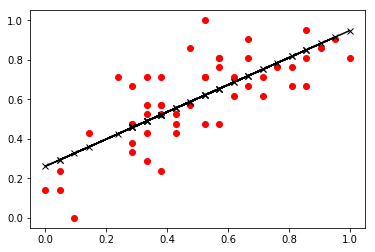

In [18]:
y_pred = net(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

## Parametros

In [15]:
for p,w in net.state_dict().items():
    print(p, w.numpy())

weight [[ 0.26134181  0.68646938]]


In [16]:
# valor ótimo, solução analítica
x_bias = x_train_bias.numpy()
y = y_train.numpy()
w_opt = (np.linalg.inv((x_bias.T).dot(x_bias)).dot(x_bias.T)).dot(y)
print(w_opt)

[[ 0.26134157]
 [ 0.68647003]]
